In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# the dataset into python environment

In [29]:
data=pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#  Make ‘PassengerId’ as the index column

In [30]:
data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# basic details of the dataset

In [31]:
data.shape

(891, 11)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [33]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

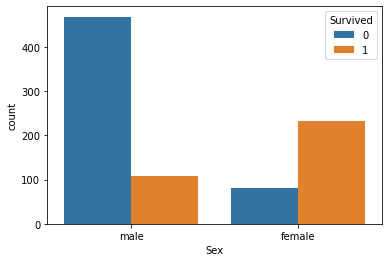

In [35]:
sns.countplot(x ='Sex',hue='Survived', data=data)

C:\Users\SEETHU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

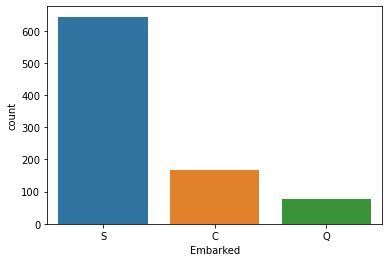

In [36]:
sns.countplot(data['Embarked'])

# missing values present in all the columns

In [37]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [38]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

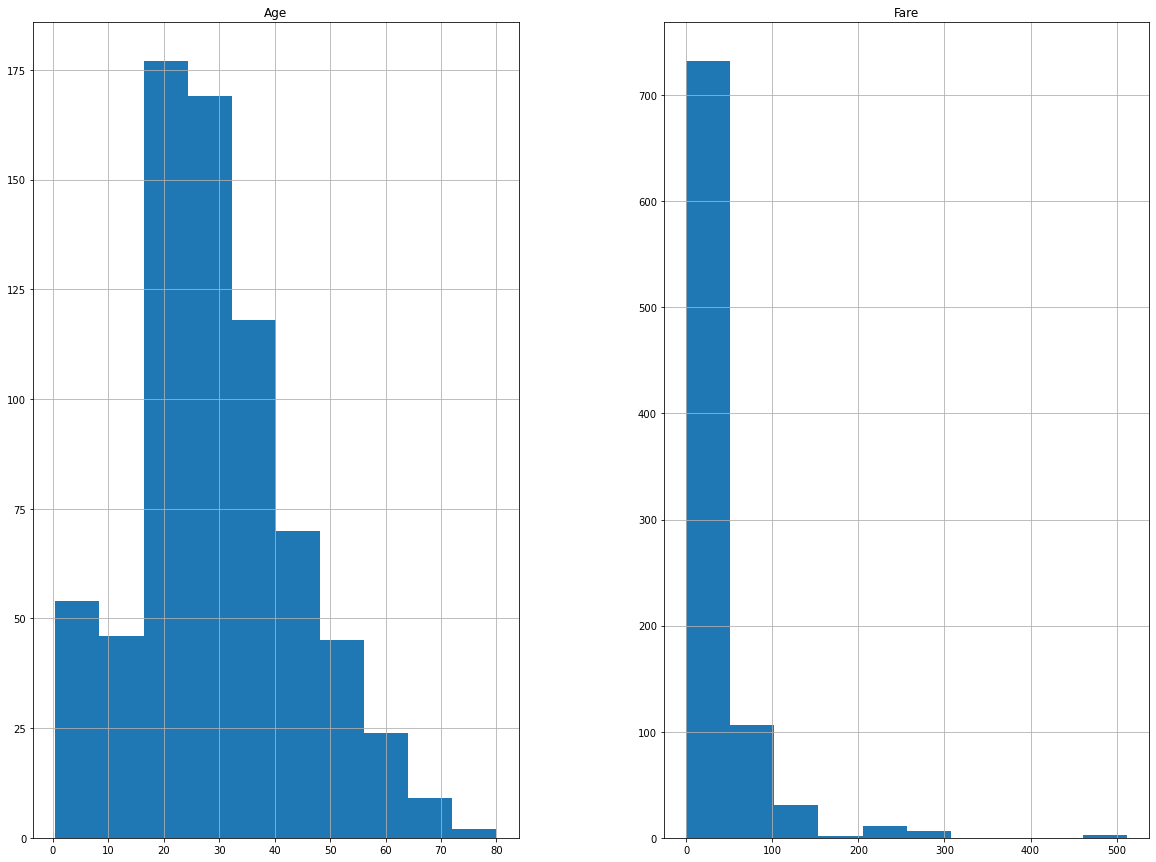

In [39]:
freqgraph = data.select_dtypes(include =['float'])
freqgraph.hist(figsize =(20,15))
plt.show()

In [40]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [41]:
mode = data["Embarked"].mode()
mode

0    S
Name: Embarked, dtype: object

In [42]:
data['Embarked']=data['Embarked'].fillna('S')
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [43]:
data=data.fillna(0)

In [44]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Check and handle outliers

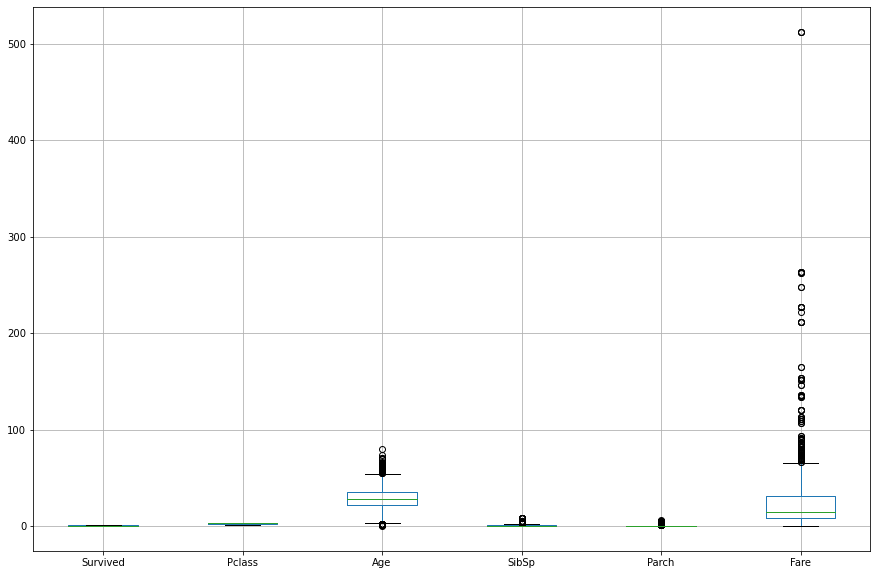

In [45]:
data.boxplot(figsize=(15,10))
plt.show()

In [46]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in data['Age']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['Age']>uplim
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [47]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace = True)

In [48]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in data['SibSp']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['SibSp']>uplim
data.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [49]:
data.drop([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace = True)

In [50]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in data['Fare']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['Fare']>uplim
data.loc[ind1].index

Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
            ...
            760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
           dtype='int64', name='PassengerId', length=104)

In [51]:
data.drop([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103, 119, 121, 140,
            152, 216, 219, 225, 231, 246, 257, 258, 259, 270, 291, 292, 298,
            306, 307, 308, 311, 312, 319, 320, 326, 330, 333, 335, 337, 338,
            370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 446, 454, 485,
            487, 499, 505, 506, 521, 524, 528, 538, 541, 551, 558, 559, 582,
            586, 610, 616, 628, 642, 646, 656, 666, 680, 682, 690, 699, 701,
            709, 717, 731, 738, 742, 743, 755, 760, 764, 780, 790, 803, 836,
            850, 857],inplace = True)

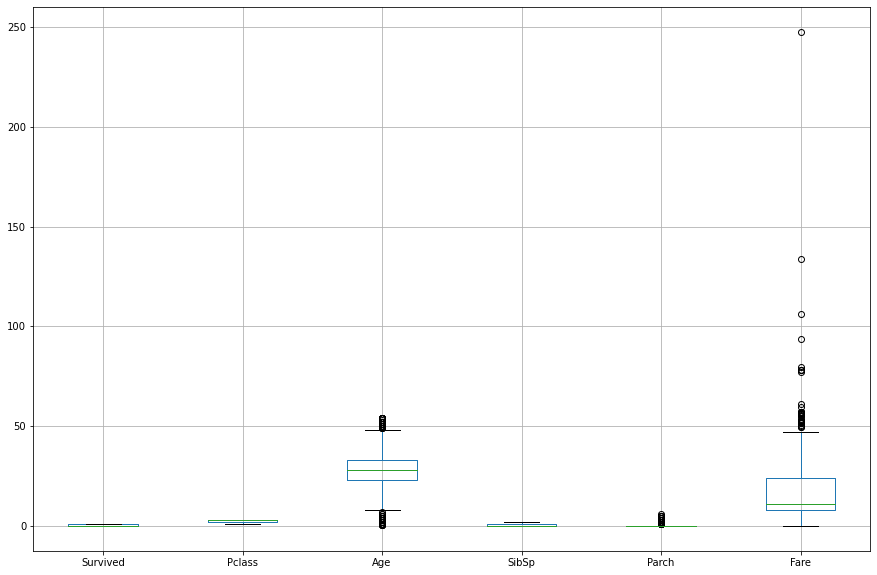

In [52]:
data.boxplot(figsize=(15,10))
plt.show()

# min max scaling on the feature set 

In [34]:
y=data['Survived']
x=data.drop(['Survived','Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [55]:
data=data.drop(['Name','Ticket','Cabin'],axis=1)

# data encoding

In [56]:
from sklearn.preprocessing import LabelEncoder
laben =LabelEncoder()
a=['Sex','Embarked']
for i in np.arange(len(a)):
    data[a[i]]=laben.fit_transform(data[a[i]])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
6,0,3,1,28.0,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,2
888,1,1,0,19.0,0,0,30.0000,2
889,0,3,0,28.0,1,2,23.4500,2


In [57]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

# scaling on the feature set

In [58]:
y=data['Survived']
x=data.drop(['Survived'],axis=1)

In [59]:
x.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,2.481690,0.683099,28.391901,0.291549,0.291549,17.692687,1.591549
std,0.729455,0.465597,10.494077,0.518555,0.761049,17.338858,0.745035
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,23.000000,0.000000,0.000000,7.879200,1.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,11.187500,2.000000
75%,3.000000,1.000000,33.000000,1.000000,0.000000,24.150000,2.000000
max,3.000000,1.000000,54.000000,2.000000,6.000000,247.520800,2.000000


In [60]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler()
x = minmax.fit_transform(x)
x=pd.DataFrame(x)

In [61]:
x.describe()

,0,1,2,3,4,5,6
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,0.740845,0.683099,0.522059,0.145775,0.048592,0.071480,0.795775
std,0.364727,0.465597,0.195858,0.259277,0.126841,0.070050,0.372517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.421426,0.000000,0.000000,0.031832,0.500000
50%,1.000000,1.000000,0.514744,0.000000,0.000000,0.045198,1.000000
75%,1.000000,1.000000,0.608063,0.500000,0.000000,0.097568,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# classification model

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 34,test_size =0.2 )

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# 1.LinearRegression

In [64]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

model = lr.fit(x_train,y_train)
predictions= model.predict(x_test)

print(y_test)
print(predictions)

PassengerId
59     1
358    0
576    0
261    0
208    1
      ..
871    0
104    0
440    0
142    1
85     1
Name: Survived, Length: 142, dtype: int64
[ 0.92748285  0.6939428   0.18945486  0.11338927  0.17620579  0.36470751
  0.76766413 -0.00383937  0.18767036  0.7400902   0.62858888  0.48829442
  0.39721441  0.62858888  0.12916593  0.79704148  0.24577114  0.54148708
  0.22838376  0.77772773  0.13298692  0.02705733  0.44318536  0.08800678
  0.15736574  0.18022484  0.58665742  0.06326527  0.71069979  0.172109
  0.11233406  0.34237332  0.66042883  0.15503473  0.10501077  0.35732939
  0.6287969   0.38308175 -0.04532683  0.49277485  0.09710756  0.34631306
  0.48444033  0.87366001  0.3808032   0.13442994  0.59110589  0.47273034
  0.13374456 -0.09998405  0.86889462  0.30560283  0.10266258  0.56909729
  0.09710756  0.09670255  0.1703647   0.28296663  0.16885216  0.09638527
  0.94212701  0.12014185  0.01493135  0.06568392  0.74085513  0.2991787
  0.75928564  0.07824938  0.64429066  0.1769002

In [65]:
from sklearn.metrics import mean_squared_error
print('MSe is ',mean_squared_error(y_test,predictions))

from sklearn.metrics import r2_score
print('R squared value is ',r2_score(y_test,predictions))

MSe is  0.16629417452803247
R squared value is  0.29923600100663594


# 2.LogisticRegression

In [66]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions= logmodel.predict(x_test)

In [67]:
print('Accuracy is: ',accuracy_score(y_test,predictions))
confusion_matrix(y_test,predictions)

Accuracy is:  0.7605633802816901


array([[75, 12],
       [22, 33]], dtype=int64)

# 3.KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors=np.arange(3,15)
for K in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=K,metric='minkowski')
    classifier.fit(x_train,y_train)
    predictions= classifier.predict(x_test)
    acc=accuracy_score(y_test,predictions)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

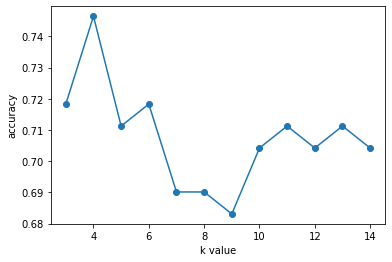

In [69]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [70]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
classifier.fit(x_train,y_train)
predictions= classifier.predict(x_test)

In [71]:
print('Accuracy is: ',accuracy_score(y_test,predictions))
confusion_matrix(y_test,predictions)

Accuracy is:  0.7464788732394366


array([[79,  8],
       [28, 27]], dtype=int64)

# 4.decision tree

In [72]:
from sklearn.tree  import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
predictions= dtmodel.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.7464788732394366


In [73]:
confusion_matrix(y_test,predictions)

array([[68, 19],
       [17, 38]], dtype=int64)

# 5.SVM

In [74]:
from sklearn.svm import SVC
svmlinear = SVC(kernel='linear')
svmlinear.fit(x_train,y_train)
predictions= svmlinear.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.7394366197183099


In [75]:
svmpoly = SVC(kernel='poly',degree =3)
svmpoly.fit(x_train,y_train)
predictions= svmpoly.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.7535211267605634


In [76]:
svmradial = SVC(kernel='rbf')
svmradial.fit(x_train,y_train)
predictions= svmradial.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.7535211267605634


# 6.RandomForest

In [77]:
from sklearn.ensemble  import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions= rf.predict(x_test)
predictions

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [78]:
confusion_matrix(y_test,predictions)

array([[72, 15],
       [18, 37]], dtype=int64)

In [79]:
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.7676056338028169


# 7.Gaussion Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)
predictions= classifier.predict(x_test)

In [82]:
print('Accuracy is: ',accuracy_score(y_test,predictions))
confusion_matrix(y_test,predictions)

Accuracy is:  0.7816901408450704


array([[70, 17],
       [14, 41]], dtype=int64)

# 8.Bernoulli Naive Bayes

In [83]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(x_train,y_train)
predictions= classifier.predict(x_test)

In [84]:
print('Accuracy is: ',accuracy_score(y_test,predictions))
confusion_matrix(y_test,predictions)

Accuracy is:  0.7394366197183099


array([[72, 15],
       [22, 33]], dtype=int64)

From these models, it is clear that 78% accuracy is shown by Guassion Naive Bayes model. So this model will be the best fit model.
